# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# **Reading File**

In [ ]:
df = pd.read_csv('Advertising.csv')


# **Exploring DataSet**

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# **Checking for Inconsistent Data**

*   Duplication
*   Null/Missing Values
*   Renaming Inconsistent Column Names
*   Checking for DataTypes















# Duplication

In [ ]:
df[df.duplicated()].sum()

Index        0.0
TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

# Null/Missing Values

In [ ]:
df.isna().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Renaming Inconsistent Column Names

In [ ]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [ ]:
df.columns

Index(['Index', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Checking For Data Types

In [ ]:
df.dtypes

Index          int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# **Exploratory Data Analysis**


*   Visualizing Distributions through Histograms
*   Visualizing Relationship between all attributes and Sales through Scatter Plots
*   Visualizing Correlation through Heatmap



# Visualizing Distributions through Histograms

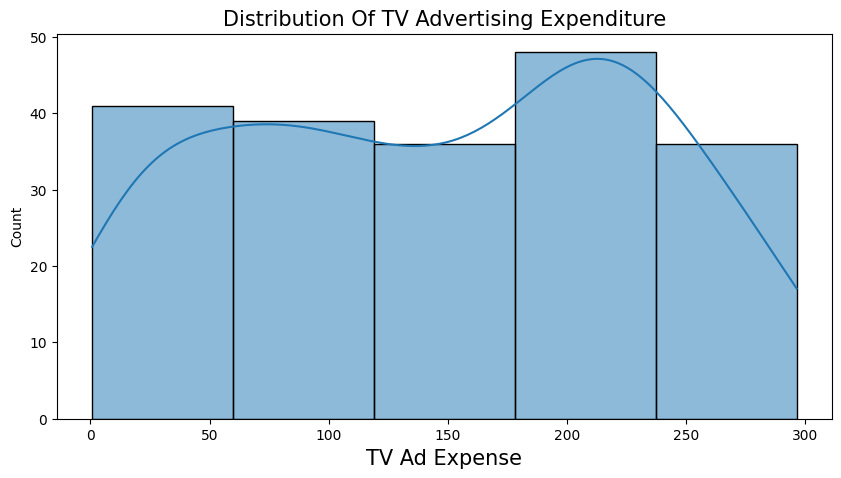

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x='TV', data=df, kde=True, bins=5)
plt.xlabel('TV Ad Expense',fontsize=15)
plt.title('Distribution Of TV Advertising Expenditure', fontsize=15)
plt.show()

*Normal Distribution of TV Ads Expense*

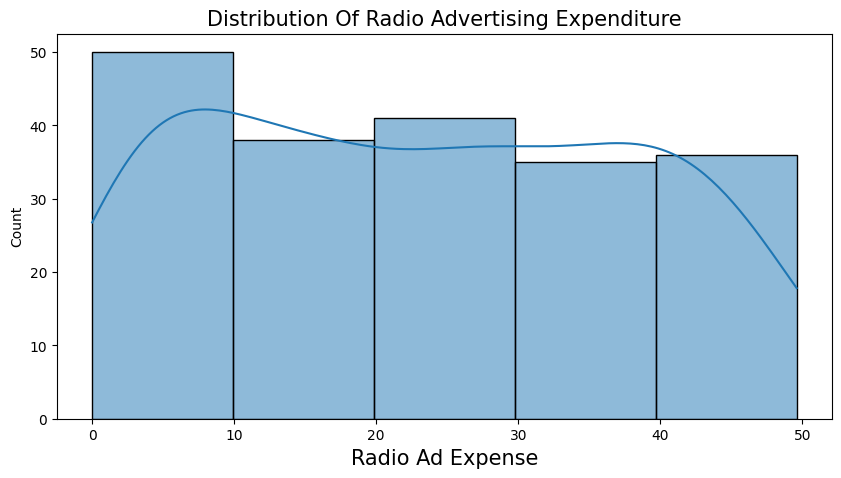

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Radio', data=df, kde=True, bins=5)
plt.xlabel('Radio Ad Expense',fontsize=15)
plt.title('Distribution Of Radio Advertising Expenditure', fontsize=15)
plt.show()

*Normal Distribution of Radio Ads Expense*

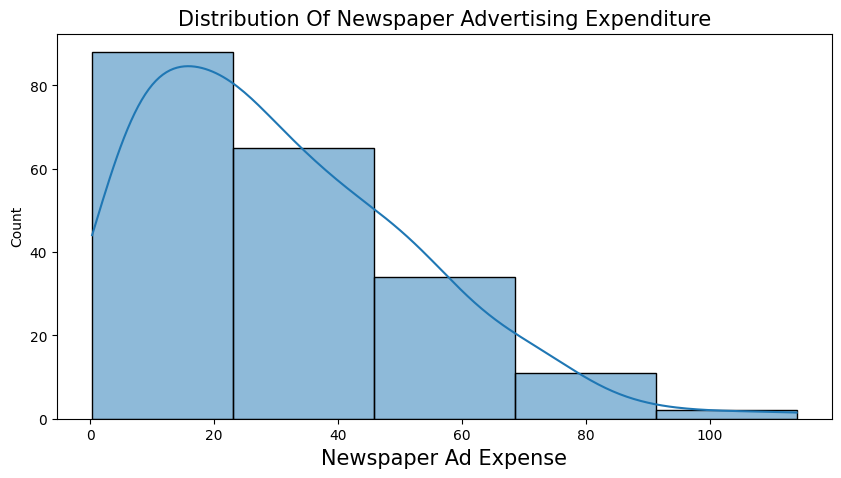

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Newspaper', data=df, kde=True, bins=5)
plt.xlabel('Newspaper Ad Expense',fontsize=15)
plt.title('Distribution Of Newspaper Advertising Expenditure', fontsize=15)
plt.show()

*Positively Skewed Distribution of Newspaper Ads Expense*

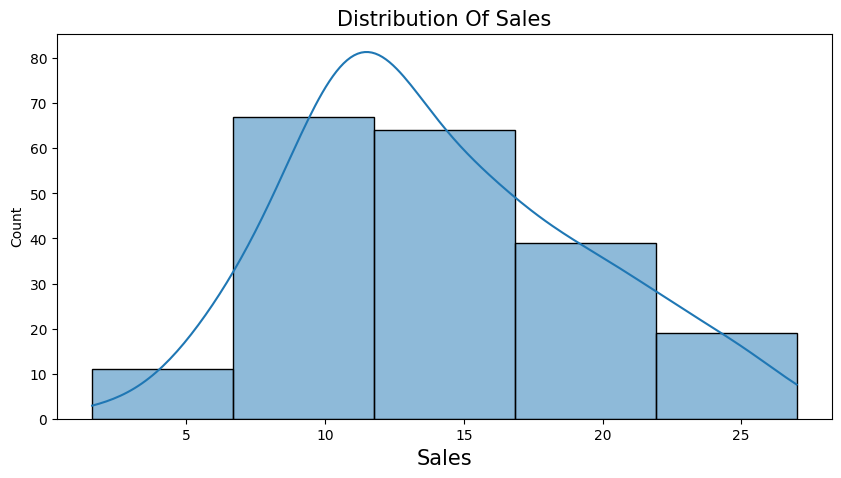

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Sales', data=df, kde=True, bins=5)
plt.xlabel('Sales',fontsize=15)
plt.title('Distribution Of Sales', fontsize=15)
plt.show()

*Normal Distribution of Sales*

# Visualizing Relationship between all attributes and Sales through Scatter Plots

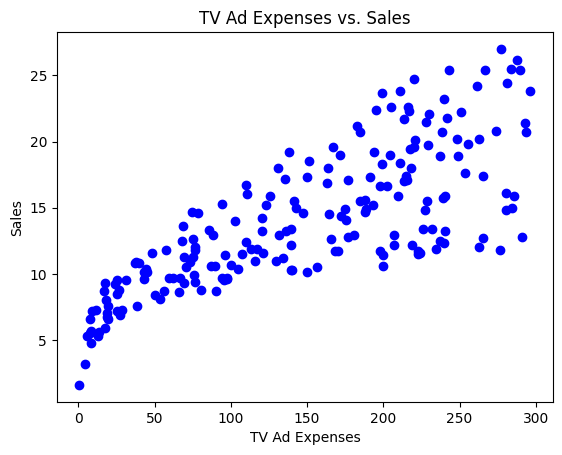

In [ ]:
plt.scatter(x='TV', y='Sales', c='blue', data=df)

plt.xlabel('TV Ad Expenses')
plt.ylabel('Sales')
plt.title('TV Ad Expenses vs Sales')

plt.show()



*A linear relationship between Sales and TV ads expense can be observed showing that it is directly proportional*

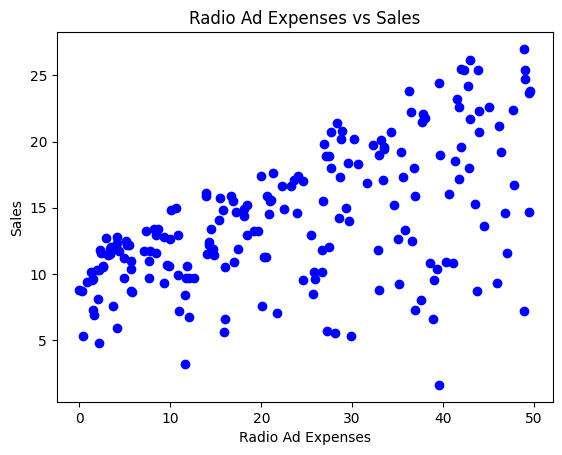

In [ ]:
plt.scatter(x='Radio', y='Sales', c='blue', data=df)

plt.xlabel('Radio Ad Expenses')
plt.ylabel('Sales')
plt.title('Radio Ad Expenses vs Sales')

plt.show()



*A linear relationship between Radio Ads expense and Sales can be observed showing that it is directly proportional*

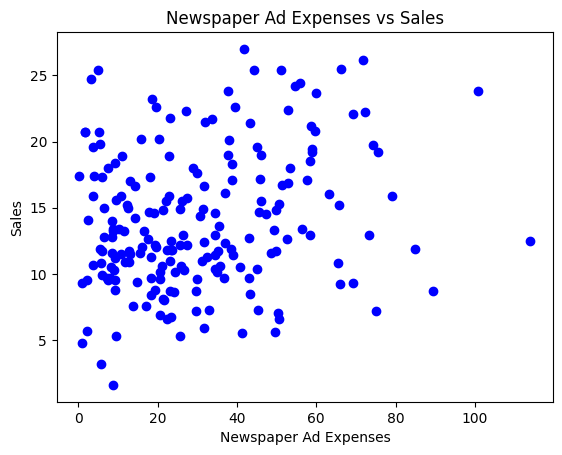

In [ ]:
plt.scatter(x='Newspaper', y='Sales', c='blue', data=df)

plt.xlabel('Newspaper Ad Expenses')
plt.ylabel('Sales')
plt.title('Newspaper Ad Expenses vs Sales')

plt.show()



*Newspaper ads expense has a scattered distribution over Sales attribute*

# Visualizing Correlation through Heatmap

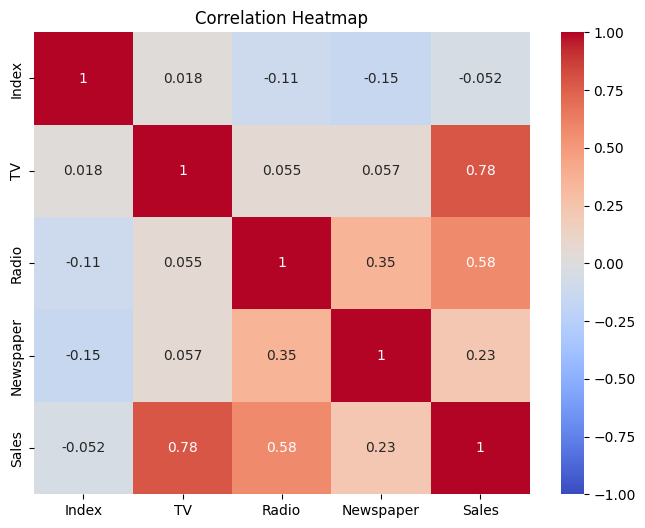

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set plot labels and title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

***TV attribute has the highest correlation with Sales(target variable) followed by Radio and Newspaper. This concludes that high TV ad expense can potentially grow Sales***

# **Splitting Data**

In [ ]:
X=df.drop(columns=['Sales', 'Index'])
Y=df['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state=1)

In [ ]:
X_test

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0
198,283.6,42.0,66.2
95,163.3,31.6,52.9
4,180.8,10.8,58.4
29,70.6,16.0,40.8
168,215.4,23.6,57.6


In [ ]:
Y_test

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
Name: Sales, dtype: float64

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print("Accuracy: ",model.score(X_test,Y_test)*100)

Accuracy:  85.00219587771265


In [ ]:
predictions=model.predict(X_test)

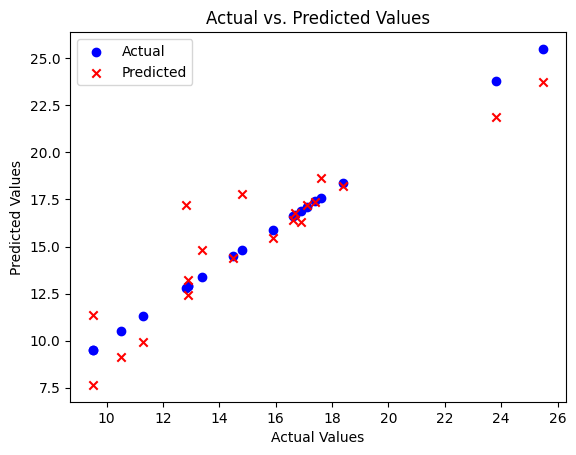

In [ ]:
actual_values = Y_test
predicted_values = predictions
# Plot actual values in blue
plt.scatter(Y_test, Y_test, color='blue', label='Actual', marker='o')

# Plot predicted values in red
plt.scatter(Y_test, predictions, color='red', label='Predicted', marker='x')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)

# Print the results
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

R-squared (R2): 0.8500219587771265
Mean Absolute Error (MAE): 1.1323494929752378
Mean Squared Error (MSE): 2.5031335080097588
